# Maximum Likelihood Estimation - estimating $\beta$ and $H$

__Outline of topics:__
1. Distribution of MLE, scores and Fisher information, and Cramer-Rao bound
2. Asymptotic distributions of MLEs
3. Later on
    - Bootstrapping error for MLEs (due to lack of known distributions)
    - Wilks' theorem - asymptotic distribution of MLE - and Wilks' test
    - Lagrange multiplier test (score test)
    - Wald test

Suppose we are given a sample of observations from a supposed Gibbsian distribution, say the 2D nearest neighbors Ising model. However, we do not know the underlying parameters of the distribution, particularly the combination $K=\displaystyle \frac{J}{k_\text{B} T}$. Two straight forward methods for determining $K$ are that of maximum likelihood estimation and maximizing (differential) entropy.

__Question:__ Are these two concepts actually related? See [here](https://stats.stackexchange.com/questions/504117/is-there-a-relationship-between-maximum-likelihood-estimation-and-the-maximum-en).

##  Maximum Likelihood

Suppose we don't know $\beta$, but have a sample of independent energy measurements. We can then use a maximum likelihood estimator to infer $\beta$. We won't try for a analytic result (there likely isn't one), but use a spread of algorithms to compute $\beta$ numerically as the maximum likelihood value.

Thus, the probablity of measuring $E_k$ is $$p(E_k)=\mathcal{Z}(\beta)^{-1}\sum_{E=E_k}\exp(-\beta E)=\mathcal{Z}^{-1}\Omega(E_k)\exp(-\beta E_k).$$
The above expression requires that we know the partition function and the energy degeneracy. We can compute these exactly for small $L$. We currently have implemented the computation via exact enumeration for $L \in \{2,3,4\}$. Remember that $L$ is the linear size, and the number of configurations scales as $2^{L^2}$, so $N_\mathcal{C} \sim \{16,512,65536\}$ for our range of $L$.

In practice, we use the log-likelihood ln$\,p(E_k)$ which yields the same extrema,
\begin{eqnarray}
\ln \,p(E_k) &=&-\ln \mathcal{Z}-\beta E_k+\ln \Omega(E_k) \\
&=& -\ln \mathcal{Z}-\beta\left( E_k-T \,S(E_k) \right)
\end{eqnarray}
where we introduced the entropy as $\Omega(E_k)=\exp(S(E_k))$. One can use the first expression to obtain the likelihood of a sample $\{E_i\}_{i=1,..,n}$ of energy observations.
\begin{eqnarray}
\ln \,p(\{E_i\}) &=&-n*\ln \mathcal{Z}+ \sum_{i=1}^n \left(-\beta\,E_i+\ln \Omega(E_i)\right) \\
&=&-n*\ln \mathcal{Z}+ \sum_{k=1} \text{Count}(\{E_i\},E_k) \left(-\beta\,E_k+\ln \Omega(E_k)\right)
\end{eqnarray}
where the second sum is over the python set "set$\left(\{E_i\}\right)$" with elements labelled by $k$, and Count$(A,a)$ counts the occurences of a in A.

## Distribution of MLE from MCMC

The maximum likelihood estimator (MLE) $\hat{\theta}$ of a quantity $\theta$ is itself a random variable. One can show that the MLE is asymptotically normally distributed. In this situation, one can put confidence intervals on the MLE estimate as usual using the sample variance and the t-distribution.

If the experiment is computationally expensive such that multiple runs is not feasible, how then how can one estimate the error in the estimator $\hat{\theta}$? One approach is to bootstrap the error.

For large sample sizes, one can show that the MLE is asymtotically normal. For 
$n$ iid observations $\hat{\theta}$ is distrbuted
    $$\sqrt{n}\left(\hat{\theta}-\theta_0\right) \sim \mathcal{N}(0, \mathcal{I}_{\theta_0}^{-1})$$
    $$ \text{Var}(\hat{\theta}) \approx \left( n \mathcal{I}_{\theta_0}\right)^{-1}$$
This gives the standard $95$% confidence interval
$$\theta_0 \in \hat{\theta} \pm 1.96 \sqrt{\frac{1}{n\,I_0}}$$
In general, one has the Cramer-Rao bound which states the variance of any MLE is bounded from below by the reciprocal of the Fisher information. Given the relation $I_n=n\,I_0$ for $n$ iid observations and the fact that $I_0$ doesn't depend on the sample, we see that the Fisher information sets the precision to which we can determine the MLE.

Repeating the Monte Carlo alogrithm with fixed parameters produces the distrubtion of averages values of $M$ and $E$. In addition, it also produces the distribution of the MLE, since the MLE is itself a random variable - the MLE is a function of a random sample. So too are the scores. For the Gibbs distribution of the Ising model, we have the following expression for the scores and Fisher information corresponding to a sample $X$ generated via Monte Carlo
\begin{align}
s(X|\beta) &= \langle E \rangle - \bar{E}_X  \\
\text{Var}(s(X|\beta)) &= n\,I_0 \\
I_0 &= \langle E^2 \rangle - \langle E \rangle^2 
\end{align}
Since the Fisher information is given by the specfic heat, which diverges near $T=T_c$, we see that MLE is more precise (lower variance) near the phase transition.

__How to perform MLE for larger $N$ with arbitrary $K=\beta J$ and $h=\beta H$:__
1. Devise a method which doesn't require knowledge of $\mathcal{Z}$ or $\Omega$.
2. Measuring E and M and doing some joint distribution thing and incorporating knowledge and/or estimates of Var$(E)$ or Var$(M)$.
4. Use the exact results for the energy distribution as given in [this article](https://link.aps.org/doi/10.1103/PhysRevLett.76.78) by Beale.
5. Other methods - see articles [1](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.108.090201) and [2](https://linkinghub.elsevier.com/retrieve/pii/S1875389214002855).

## Section contents:
1. MLE for $\beta$ from random samples of the exact distribution:
    - Here we plot the log-likelihood $\ell(X|\beta)-\ell(X|\beta=\beta_0)$ of samples $X$ of various size normalized by $\ell(X|\beta=\beta_0)$ so as to compare the plots.
    - Sample size produces a larger curvature in the log-likelihood, thus increasing the precision of the MLE.
2. MLE from MCMC data:
    - Here we do a single MCMC run to compute the log-likelihood using the exact distribution.
    - The max of $\ell(X|\beta)$ corresponds to our MLE estimate for $\beta$.
    - We compute via a minimization procedure of $-\ell(X|\beta)$ and a root finder on the $\beta$-derivative of $\ell(X|\beta)$, i.e. the score.
3. Distribution of MLE from MCMC data:
    1. Produce the distribtuion of the MLE, $\hat{\beta}$, obtained from $N_runs=100$ different MCMC runs.
    2. Compare MLE distributions for increasing numbers of runs to see the asymptotic normal distribution. We aim to reproduce:
        - $ \text{Var}(\hat{\theta}) \approx \left( n \mathcal{I}_{\theta_0}\right)^{-1}$,
        - $\text{Var}(s(X|\beta)) = n\,I_0 $.
4. Multivariate MLE for $K=\beta J$ and $h=\beta H$ without knowledge of exact distribution:
    - To be performed later.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from packages.Ising_functions import *
from packages.MCMC_functions import *

H = 0

# MLE for $\beta$ from random samples of the exact distribution:

In [2]:
L, T = 3, 3
beta = 1/T

energy_list = sorted(list(set(E_list(L))))
prob_set = [prob_E(L, T, H, e) for e in energy_list]
E_mean = np.sum([e*p for e,p in zip(energy_list, prob_set)])

N_samples = 10**3
E_samplemean = np.mean(np.random.choice(energy_list, N_samples, p = prob_set))
print(E_mean)
print(E_samplemean)

-10.393972199869003
-10.432


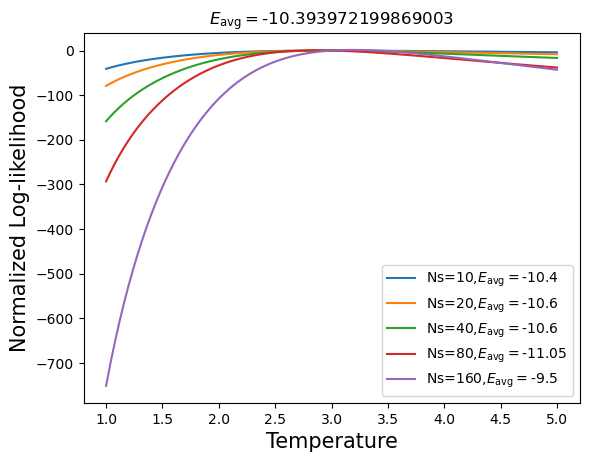

In [4]:
temperature_range = np.linspace(1,5,100)
Samplesize_range = [10, 20, 40, 80, 160]
randon_energy_set = [list(np.random.choice(energy_list, ns, p = prob_set)) for ns in Samplesize_range]

fig, ax = plt.subplots(1,1)
for re in randon_energy_set:
    log_prob_data = [log_prob_Eset(L, t, H, re)- log_prob_Eset(L, 3, H, re) for t in temperature_range]
    ax.plot(temperature_range, log_prob_data, label = f"Ns={len(re)},"+r"$E_{{{\text{avg}}}}=$"+f"{np.mean(re)}")
ax.set_xlabel("Temperature", fontsize=15) 
ax.set_ylabel("Normalized Log-likelihood", fontsize=15)
ax.legend()
ax.set_title(r"$E_{{{\text{avg}}}}=$"+f"{E_mean}")
plt.show()

# MLE from MCMC data:

In [5]:
from time import time

In [6]:
L, T = 3, 3
beta = 1/T

N_sites = L**2
N_burnin = 100*N_sites
N_iterations = (10**4)*N_sites
time_stop = 100*N_sites

N_runs = 1

t0 = time()
# traces = []
log_trace = []
E_trace = []
for t in range(N_runs):
    M = hotstart(L)
    trace = Metropolis_update(M, beta, H, N_burnin + N_iterations)
    trace = trace[N_burnin:]

    Mag_data = np.abs(trace[:,0])/N_sites
    #l_m = exp_corr_len(auto_corr(Mag_data))/N_sites

    E_data = trace[:,1]
    #l_e = exp_corr_len(auto_corr(E_data))/N_sites

    t_steps = 100
    temperature_range = np.linspace(1, 8, t_steps)
    E_samples = list(E_data)
    E_trace.append(E_samples)
    log_prob_data = [log_prob_Eset(L, t, H, E_samples) for t in temperature_range]
    log_trace.append(log_prob_data)
    
print("Computation time =", time()-t0)

Computation time = 1.3984472751617432


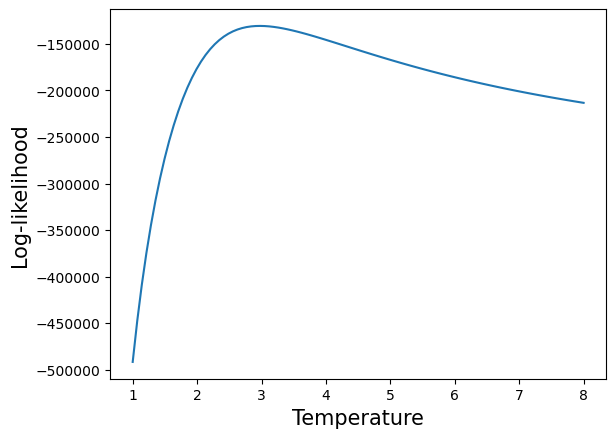

Maximimum likelihood estimate of the temperatre: T = 2.9737601207487465
Computaiton time using scipy's scalar minimization = 0.08695249557495117  seconds
Maximimum likelihood estimate of the temperatre: T = 2.973760038549493
Computaiton time using scipy's scalar root finder = 0.15513358116149903  seconds


In [7]:
fig, ax = plt.subplots(1,1)
for t in range(N_runs):
    log_prob_data = log_trace[t]
    ax.plot( T_range, log_prob_data)
ax.set_xlabel( "Temperature", fontsize=15) 
ax.set_ylabel( "Log-likelihood", fontsize=15)
plt.show()

from scipy.optimize import minimize_scalar
from scipy.optimize import root_scalar

t0 = time()

E_samples = E_trace[0]

## MLE as minimization on log likelihood
def min_f(t):
    return -log_prob_Eset(L, t, H, E_samples) 

for t in range(10):
    res=minimize_scalar(min_f, bounds = (1, 5), method = 'bounded')
    
print(f"Maximimum likelihood estimate of the temperatre: T = {res.x}")
print("Computaiton time using scipy's scalar minimization =", (time()-t0)/10, " seconds")

## MLE as a root of the deriviative of log likelihood - the score
def root_f(t):
    energy_list = sorted(list(set(E_list(L))))
    prob_set = [prob_E(L, t, H, e) for e in energy_list]
    E_mean = np.sum([e*prob_E(L, t, H, e) for e in energy_list])
    return E_mean - np.mean(E_samples)

for t in range(10):
    res = root_scalar(root_f, bracket=[1, 5])
    
print(f"Maximimum likelihood estimate of the temperatre: T = {res.root}")
print("Computaiton time using scipy's scalar root finder =", (time()-t0)/10, " seconds")

# Distribution of MLE from MCMC data:

## MLE distribution for N_runs = 100

In [8]:
L, T = 3, 3
beta = 1/T

energy_list = sorted(list(set(E_list(L))))
prob_set = [prob_E(L, T, H, e) for e in energy_list]
E_mean = np.sum([e*p for e,p in zip(energy_list, prob_set)])
E_var = np.sum([(e-E_mean)**2*p for e,p in zip(energy_list, prob_set)])

In [9]:
N_sites = L**2
N_burnin = 100*N_sites
N_iterations = (10**4)*N_sites
time_stop = 100*N_sites

N_runs = 100

t0 = time()
# traces = []
log_trace = []
E_trace = []
MLE_trace = []
for t in range(N_runs):
    M = hotstart(L)
    trace = Metropolis_update(M, beta, H, N_burnin + N_iterations)
    trace = trace[N_burnin:]

    Mag_data = np.abs(trace[:,0])/N_sites
    #l_m = exp_corr_len(auto_corr(Mag_data))/N_sites

    E_data = trace[:,1]
    #l_e = exp_corr_len(auto_corr(E_data))/N_sites

    E_samples = list(E_data)
    E_trace.append(E_samples)
    
    def min_f(t):
        return -log_prob_Eset(L, t, H, E_samples) 
    
    res = minimize_scalar(min_f, bounds = (1, 5), method = 'bounded')
    MLE_trace.append(1/res.x)

print(f"Computation time for N_runs = {N_runs}: ", time()-t0, " seconds")

Computation time for N_runs = 100:  72.84732484817505  seconds


Population variance =  44.79732026412449 
 Sample variance =  44.838136193197215


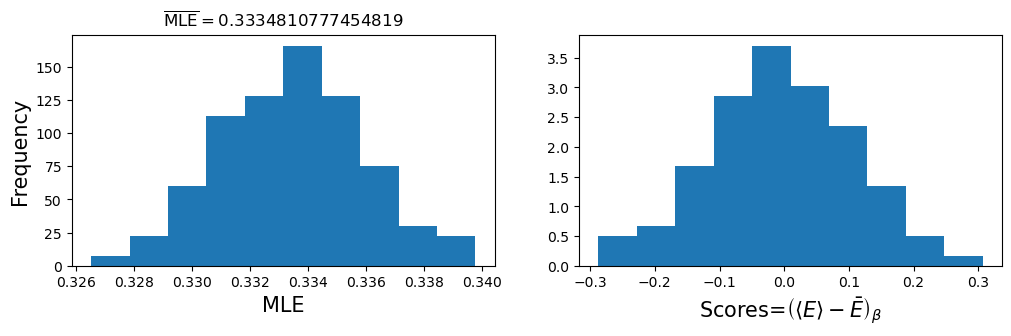

l_e =  15
MLE variance versus Fisher information: 
 percent difference 14.025891890169174
Score variance versus Fisher information: 
 percent difference 14.102903856718113


In [10]:
E_svar = np.mean([np.var(e, ddof = 1) for e in E_trace])
#E_svar = np.var(E_trace[-1], ddof = 1)
print("Population variance = ", E_var, "\n", "Sample variance = ", E_svar)

E_score = [(-E_mean+np.mean(e)) for e in E_trace]

fig, ax = plt.subplots(1,2, figsize = (12,3))

ax[0].hist(MLE_trace, density = True)
ax[0].set_xlabel("MLE", fontsize = 15) 
ax[0].set_ylabel("Frequency", fontsize = 15)
ax[0].set_title(r"$\overline{\text{MLE}}=$" + f"{np.mean(MLE_trace)}")

ax[1].hist(E_score, density = True)
ax[1].set_xlabel(r"Scores=$\left( \langle E \rangle -\bar{{{E}}}\right)_{\beta}$", fontsize = 15) 
plt.show()

E_samples = E_trace[-1]
l_e = exp_corr_len(auto_corr(E_samples)) 
print("l_e = ", l_e)

Effect_sample_size = len(E_samples)/(2*l_e)
In = Effect_sample_size*E_var
Var_th = 1/In

print("MLE variance versus Fisher information: \n percent difference", 
      np.abs(np.var(MLE_trace)-Var_th)/Var_th * 100)
print("Score variance versus Fisher information: \n percent difference", 
      np.abs(np.var(E_score)-E_var/Effect_sample_size)/(E_var/Effect_sample_size) * 100)

## MLE vs. N_runs

For a large enough number of runs, the sample variance in the MLE should be equal to the Fisher information.

In [11]:
T = 3
beta = 1/T

N_sites = L**2
N_burnin = 100*N_sites
N_iterations = (10**4)*N_sites
time_stop = 100*N_sites

N_runs_set = [10, 20, 40, 80, 160, 320, 640, 1260]

t0 = time()
MLE_stats = []
E_trace = []
for j in N_runs_set:
    N_runs = j
    MLE_trace = []
    for t in range(N_runs):
        M = hotstart(L)
        trace = Metropolis_update(M, beta, H, N_burnin + N_iterations)
        trace = trace[N_burnin:]

        E_samples = list(trace[:,1])
        E_trace.append(E_samples)
        
        def min_f(t):
            return -log_prob_Eset(L ,t ,H ,E_samples) 

        res = minimize_scalar(min_f, bounds = (1, 5), method = 'bounded')
        MLE_trace.append(1/res.x)
        
    MLE_stats.append([N_runs, np.mean(MLE_trace), np.var(MLE_trace, ddof=1)])


print(f"Total computation time for N_runs in {N_runs_set}: ", time()-t0, " seconds.")

Total computation time for N_runs in [10, 20, 40, 80, 160, 320, 640, 1260]:  1861.3682188987732  seconds.


energy exponential correlation length = 15

Pop variance = 44.79732026412449 
 Samp variance = 44.41234140444445  
  and N_effective*Var(score) = 45.21016000603194

MLE variance versus Fisher information: 
 percent difference: 0.9656556698038008
Score variance versus Fisher information: 
 percent difference: 0.9215724053879868


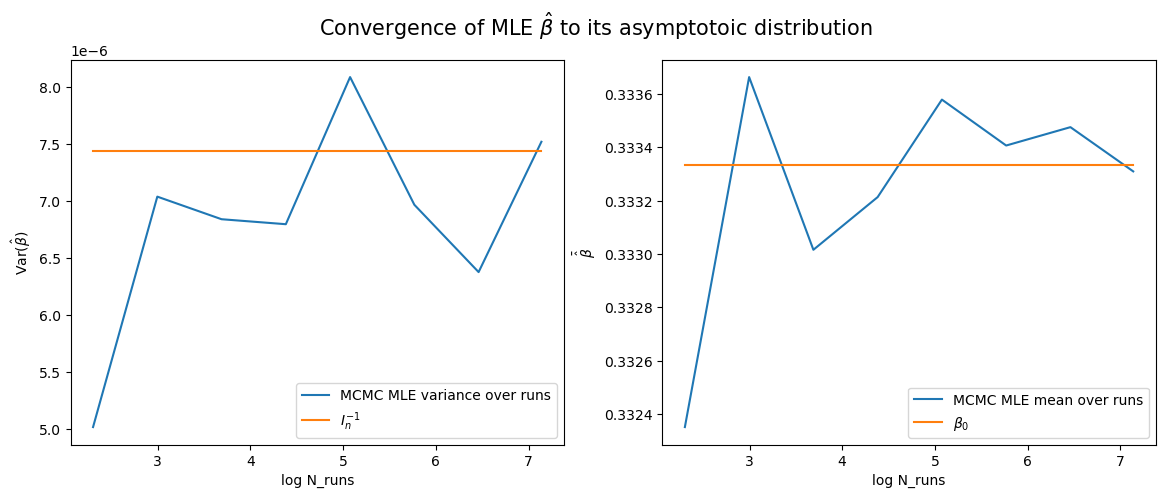

In [70]:
MLE_stats = np.array(MLE_stats)

energy_list = sorted(list(set(E_list(L))))
prob_set = [prob_E(L, T, H, e) for e in energy_list]
E_mean = np.sum([e*p for e,p in zip(energy_list, prob_set)])
E_var = np.sum([(e-E_mean)**2*p for e,p in zip(energy_list, prob_set)])

# Compute the energy variance from the very last MCMC run
E_samples = E_trace[-1]
E_svar = np.var(E_samples)

# Compute scores and from last set of runs
E_score = [(-E_mean+np.mean(e)) for e in E_trace[-N_runs_set[-1]:]]

l_e = exp_corr_len(auto_corr(E_samples))

Effect_sample_size = len(E_samples)/(2*l_e)
In = Effect_sample_size*E_var
Var_th = 1/In

print("energy exponential correlation length =", l_e)
print()
print(f"Pop variance = {E_var}", f"\n Samp variance = {E_svar}", " \n",  
      f" and N_effective*Var(score) = {Effect_sample_size*np.var(E_score)}")
print()
print("MLE variance versus Fisher information: \n percent difference:", 
      np.abs(np.var(MLE_trace)-Var_th)/Var_th * 100 )
print("Score variance versus Fisher information: \n percent difference:", 
      np.abs(np.var(E_score)-E_var/Effect_sample_size)/(E_var/Effect_sample_size)*100 )

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))
ax1.plot(np.log(MLE_stats[:,0]), MLE_stats[:,2], label = "MCMC MLE variance over runs")
ax1.plot(np.log(MLE_stats[:,0]), Var_th*np.ones(len(MLE_stats)), label = r"$I_n^{-1}$")
ax1.set_xlabel("log N_runs")
ax1.set_ylabel(r"Var($\hat{\beta}$)")
ax1.legend()

ax2.plot(np.log(MLE_stats[:,0]), MLE_stats[:,1], label = "MCMC MLE mean over runs")
ax2.plot(np.log(MLE_stats[:,0]), 1/T*np.ones(len(MLE_stats)), label = r"$\beta_0$")
ax2.set_xlabel("log N_runs")
ax2.set_ylabel(r"$\bar{\hat{\beta}}$")
ax2.legend()

fig.suptitle(r"Convergence of MLE $\hat{\beta}$ to its asymptotoic distribution", fontsize = 15)
plt.show()

In [68]:
# Ratio of MLE varaince to theorectical variance for each set of MCMC runs
MLE_stats[:,2]/Var_th

array([0.67422868, 0.94579779, 0.91917852, 0.9133107 , 1.08669428,
       0.93621973, 0.8568855 , 1.01045851])